In [1]:
# John Oliver De Guzman
# Week 8 - Assignment: Image Classification with ANN

!pip install keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils import to_categorical

2023-10-18 21:03:36.848661: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_train = pd.read_csv('fashion-mnist_train.csv')
data_test = pd.read_csv('fashion-mnist_test.csv')

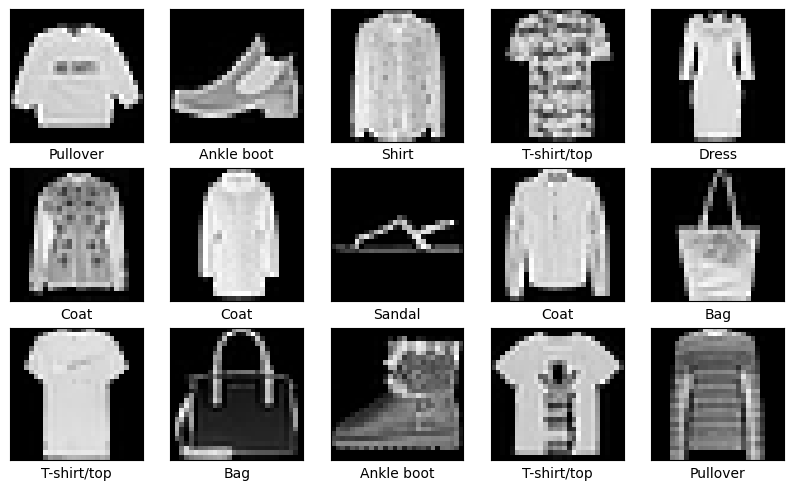

In [3]:
X_train = data_train.drop('label',axis = 1)
y_train = data_train['label']
X_test = data_test.drop('label',axis = 1)
y_test = data_test['label']


x_train_reshape = X_train.values.reshape(-1,28,28)
x_test_reshape = X_test.values.reshape(-1,28,28)


col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='gray')
    plt.xlabel(col_names[y_train[i]])
plt.show()

In [4]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='summer')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

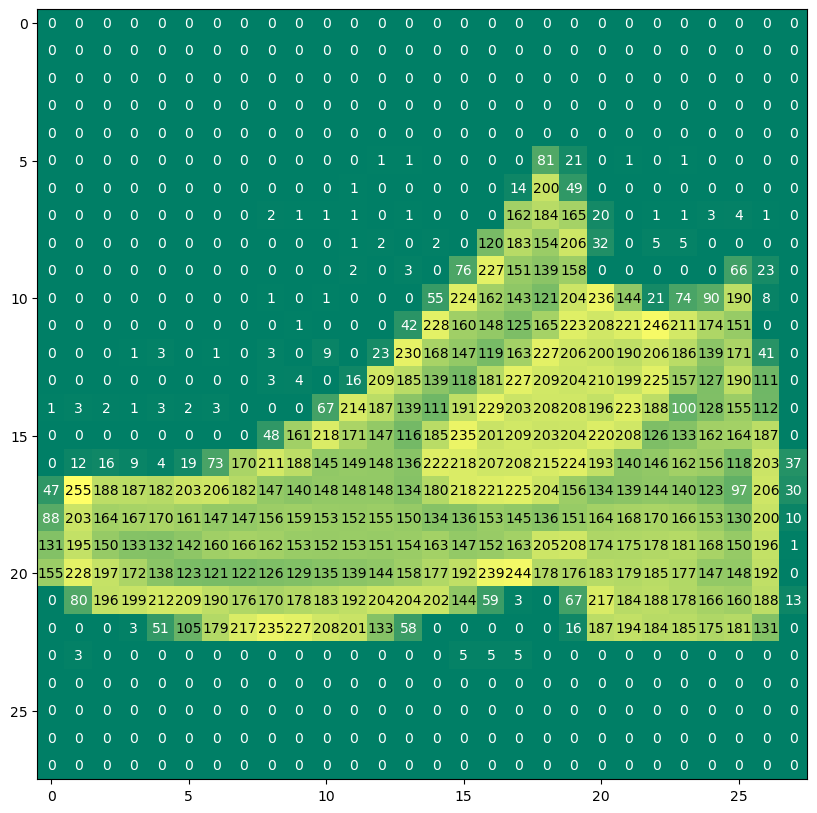

In [9]:
fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
visualize_input(x_train_reshape[1], ax)
plt.show()

In [6]:
# Encoding 
y_train = to_categorical(y_train, num_classes=10)

y_test = to_categorical(y_test, num_classes=10)

# The Model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
])

# Compiling

# Categorical crossentropy
model.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics = ['accuracy'])

# Fitting
model.fit(X_train, y_train, batch_size = 100, epochs = 35)

Epoch 1/35
600/600 [==============================] - 3s 3ms/step - loss: 1.0794 - accuracy: 0.6319
Epoch 2/35
600/600 [==============================] - 2s 3ms/step - loss: 0.7508 - accuracy: 0.7429
Epoch 3/35
600/600 [==============================] - 2s 3ms/step - loss: 0.6661 - accuracy: 0.7747
Epoch 4/35
600/600 [==============================] - 2s 3ms/step - loss: 0.6320 - accuracy: 0.7882
Epoch 5/35
600/600 [==============================] - 2s 3ms/step - loss: 0.6116 - accuracy: 0.7967
Epoch 6/35
600/600 [==============================] - 2s 3ms/step - loss: 0.5938 - accuracy: 0.8024
Epoch 7/35
600/600 [==============================] - 2s 3ms/step - loss: 0.5882 - accuracy: 0.8033
Epoch 8/35
600/600 [==============================] - 2s 3ms/step - loss: 0.5813 - accuracy: 0.8061
Epoch 9/35
600/600 [==============================] - 2s 3ms/step - loss: 0.5710 - accuracy: 0.8126
Epoch 10/35
600/600 [==============================] - 2s 3ms/step - loss: 0.5683 - accuracy: 0.8102

In [7]:
# Accuracy test
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3685 - accuracy: 0.8754


In [8]:
# Predict labels
y_predict = model.predict(X_test)
y_predict = np.argmax(y_predict, axis=1)
y_test_eval = np.argmax(y_test, axis=1)

# Confusion Matrix
matrix = confusion_matrix(y_test_eval,y_predict)
print(matrix)

313/313 [==============================] - 1s 1ms/step
[[887   0  14  14   2   0  71   0  12   0]
 [  4 979   0  12   2   1   2   0   0   0]
 [ 12   0 747  10 154   0  69   0   8   0]
 [ 42  14   6 883  29   0  23   0   3   0]
 [  1   1  44  27 868   0  56   0   3   0]
 [  1   0   0   0   0 943   2  29   4  21]
 [201   5  72  10  94   0 601   0  17   0]
 [  0   0   0   0   0  28   0 911   0  61]
 [  3   0   5   2   4   1   8   2 975   0]
 [  0   0   0   0   1  12   0  26   1 960]]
